In [50]:
from fuzzy_inference.linguistic_variable import LinguisticVariable
from fuzzy_inference.fuzzy_set import FuzzySet
import matplotlib.pyplot as plt
from fuzzy_inference.matplotlib_visualizer import LVVisualizer, FuzzySetVisualizer
from fuzzy_inference.inference_engine import InferenceEngine
from fuzzy_inference.rule import Rule

## Conscientiousness Inference

In [51]:
obligation_adherence = [
    True,
    True,
    True,
    True,
    True,
    False,
    False,
    False,
    False,
    False,
    False,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
    True,
]

at_most_few = FuzzySet.l_ramp(3, 8)
number_of_late_payments = len(
    [x for x in obligation_adherence if not x])
validity = at_most_few.mu(number_of_late_payments)

# take into account questionnaire and hard data
late_payments = LinguisticVariable('No. late payments', {
    'At most few': FuzzySet.l_ramp(3, 8),
    'More than few': FuzzySet.r_ramp(3, 8)
}, (0, 20), 'No. late payments')
conscientiousness = LinguisticVariable('Conscientiousness', {
    'Low': FuzzySet.l_ramp(0.2, 0.3),
    'Moderate': FuzzySet.trapezoidal(0.2, 0.4, 0.6, 0.8),
    'High': FuzzySet.r_ramp(0.6, 0.8)
}, (0, 1), 'percentile')
neuroticism = LinguisticVariable('Neuroticism', {
    'Low': FuzzySet.l_ramp(0.2, 0.3),
    'Moderate': FuzzySet.trapezoidal(0.2, 0.4, 0.6, 0.8),
    'High': FuzzySet.r_ramp(0.6, 0.8)
}, (0, 1), 'percentile')

engine = InferenceEngine()
engine.inputvars = [late_payments, conscientiousness]
engine.outputvars = [conscientiousness]
engine.rulebase = [
    Rule().IF(
        (
            ('Conscientiousness', 'High'),
            ('No. late payments', 'At most few')
        )
    ).THEN(
        ('Conscientiousness', 'High')
    ),
    Rule().IF(
        (
            ('Conscientiousness', 'High'),
            ('No. late payments', 'More than few')
        )
    ).THEN(
        ('Conscientiousness', 'Low')
    ),
    Rule().IF(
        (
            ('Conscientiousness', 'Moderate'),
            ('No. late payments', 'More than few')
        )
    ).THEN(
        ('Conscientiousness', 'Low')
    ),
    Rule().IF(
        (
            ('Conscientiousness', 'Low'),
            ('No. late payments', 'More than few')
        )
    ).THEN(
        ('Conscientiousness', 'Low')
    )
]


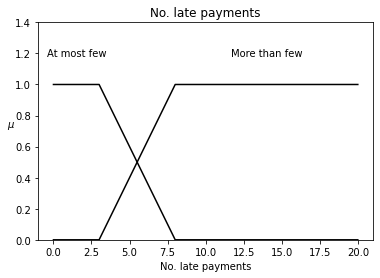

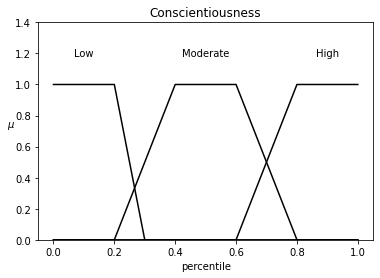

In [52]:
lv_vizualizers = [LVVisualizer(lv) for _, lv in engine.inputvars.items()]
for viz in lv_vizualizers:
    fig, ax = plt.subplots()
    viz.vizualize(ax)

In [53]:

engine.infer({
    'No. late payments': FuzzySet.triangular(7, 7, 8),
    'Conscientiousness': FuzzySet.triangular(0.8, 0.85, 0.9)
})

results = engine.defuzzify()
results


{'Conscientiousness': 0.8203203203203203}

<AxesSubplot:xlabel='x', ylabel='$\\mu$'>

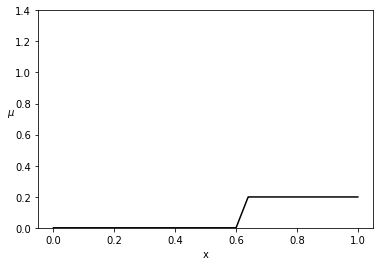

In [54]:
measured_consc = engine.output_fuzzy()['Conscientiousness']
viz_consc = FuzzySetVisualizer(measured_consc)
fig, ax = plt.subplots()
viz_consc.vizualize(ax, (conscientiousness.min, conscientiousness.max))

In [55]:
risk_capacity = LinguisticVariable('Risk Capacity', {
    'Low': FuzzySet.l_ramp(0.2, 0.3),
    'Moderate': FuzzySet.trapezoidal(0.2, 0.4, 0.6, 0.8),
    'High': FuzzySet.r_ramp(0.6, 0.8)
}, (0, 1), 'x')
risk_tolerance = LinguisticVariable('Risk Tolerance', {
    'Low': FuzzySet.l_ramp(0.2, 0.3),
    'Moderate': FuzzySet.trapezoidal(0.2, 0.4, 0.6, 0.8),
    'High': FuzzySet.r_ramp(0.6, 0.8)
}, (0, 1), 'x')
risk_requirement = LinguisticVariable('Risk Requirement', {
    'Low': FuzzySet.l_ramp(0.2, 0.3),
    'Moderate': FuzzySet.trapezoidal(0.2, 0.4, 0.6, 0.8),
    'High': FuzzySet.r_ramp(0.6, 0.8)
}, (0, 1), 'x')

risk_profile = LinguisticVariable('Risk Profile', {
    'Very conservative': FuzzySet.l_ramp(0.2, 0.3),
    'Conservative': FuzzySet.triangular(0.2, 0.3, 0.4),
    'Moderate': FuzzySet.trapezoidal(0.3, 0.4, 0.6, 0.7),
    'Aggressive': FuzzySet.triangular(0.6, 0.7, 0.8),
    'Very aggressive': FuzzySet.r_ramp(0.7, 0.8)
}, (0, 1), 'Proportion of risky assets.')

## Risk Tolerance Inference

In [56]:
rt_engine = InferenceEngine()
rt_engine.inputvars = [conscientiousness, neuroticism]
rt_engine.outputvars = [risk_tolerance]

rt_engine.rulebase = [
    Rule().IF((
        ('Conscientiousness', 'Low'),
        ('Neuroticism', 'High'),
    )).THEN((
        ('Risk Tolerance', 'Low')
    )),
    Rule().IF((
        ('Conscientiousness', 'High'),
        ('Neuroticism', 'Low'),
    )).THEN((
        ('Risk Tolerance', 'High')
    )),
    Rule().IF((
        ('Conscientiousness', 'Moderate'),
        ('Neuroticism', 'Moderate'),
    )).THEN((
        ('Risk Tolerance', 'Moderate')
    )),
]

rt_engine.infer({
    'Conscientiousness': measured_consc,
    'Neuroticism': FuzzySet.triangular(0.6, 0.8, 0.9)
})

risk_tolerance_measured_fuzzy = rt_engine.output_fuzzy()['Risk Tolerance']


## Risk Profile Inference

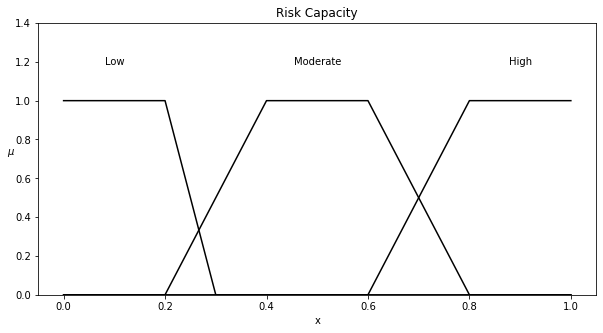

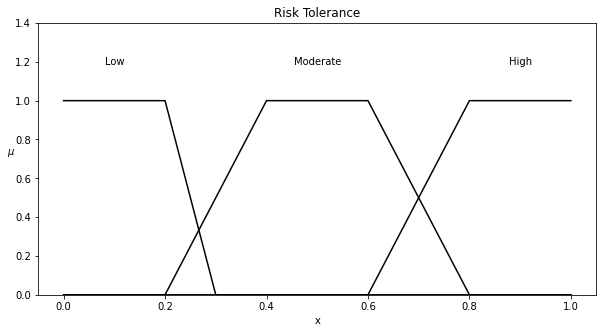

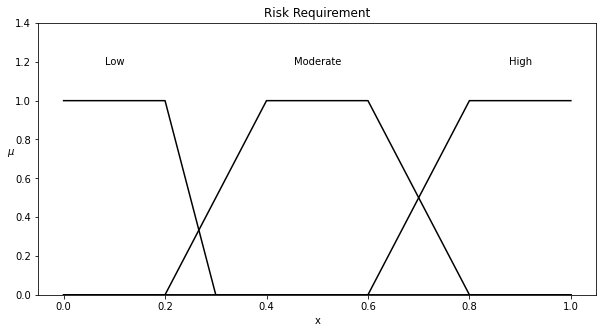

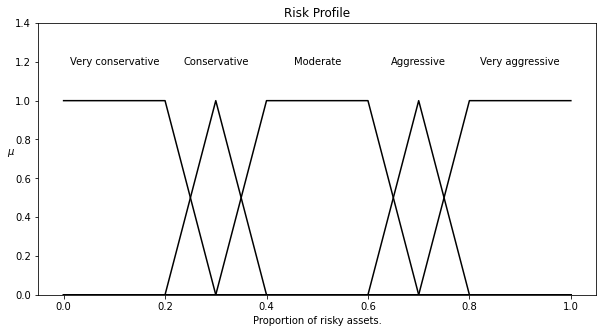

In [57]:

lv_vizualizers = [risk_capacity, risk_tolerance, risk_requirement, risk_profile]
lv_vizualizers = [LVVisualizer(lv) for lv in lv_vizualizers]
for viz in lv_vizualizers:
    fig, ax = plt.subplots(figsize=(10, 5))
    viz.vizualize(ax)

In [58]:
rp_engine = InferenceEngine()
rp_engine.inputvars = [risk_tolerance, risk_capacity, risk_requirement]
rp_engine.outputvars = [risk_profile]
rp_engine.rulebase = [
    Rule().IF((
        ('Risk Tolerance', 'Low'),
        ('Risk Capacity', 'Low'),
        ('Risk Requirement', 'Low'),
    )).THEN(
        ('Risk Profile', 'Very conservative')
    ),
    Rule().IF((
        ('Risk Tolerance', 'Low'),
        ('Risk Capacity', 'Low'),
        ('Risk Requirement', 'Moderate'),
    )).THEN(
        ('Risk Profile', 'Conservative')
    ),
    Rule().IF((
        ('Risk Tolerance', 'Low'),
        ('Risk Capacity', 'Moderate'),
        ('Risk Requirement', 'Low'),
    )).THEN(
        ('Risk Profile', 'Conservative')
    ),
    Rule().IF((
        ('Risk Tolerance', 'Moderate'),
        ('Risk Capacity', 'Low'),
        ('Risk Requirement', 'Low'),
    )).THEN(
        ('Risk Profile', 'Conservative')
    ),
    Rule().IF((
        ('Risk Tolerance', 'Moderate'),
        ('Risk Capacity', 'Moderate'),
        ('Risk Requirement', 'Moderate'),
    )).THEN(
        ('Risk Profile', 'Moderate')
    ),
    Rule().IF((
        ('Risk Tolerance', 'Moderate'),
        ('Risk Capacity', 'Moderate'),
        ('Risk Requirement', 'High'),
    )).THEN(
        ('Risk Profile', 'Aggressive')
    ),
    Rule().IF((
        ('Risk Tolerance', 'Moderate'),
        ('Risk Capacity', 'High'),
        ('Risk Requirement', 'Moderate'),
    )).THEN(
        ('Risk Profile', 'Aggressive')
    ),
    Rule().IF((
        ('Risk Tolerance', 'High'),
        ('Risk Capacity', 'Moderate'),
        ('Risk Requirement', 'Moderate'),
    )).THEN(
        ('Risk Profile', 'Aggressive')
    ),
    Rule().IF((
        ('Risk Tolerance', 'High'),
        ('Risk Capacity', 'High'),
        ('Risk Requirement', 'High'),
    )).THEN(
        ('Risk Profile', 'Aggressive')
    ),
]

very_low_hedge = FuzzySet.triangular(0, 0.1, 0.2).hedge(2)
somewhat_moderate = FuzzySet.triangular(0.3, 0.5, 0.4).hedge(0.5)
about_a_little_less_than_high = FuzzySet.triangular(0.6, 0.7, 0.8)


rp_engine.infer({
        'Risk Tolerance': risk_tolerance_measured_fuzzy,
        'Risk Capacity': very_low_hedge, 
        'Risk Requirement': about_a_little_less_than_high,
})

results_rp = rp_engine.defuzzify()
results_rp

{'Risk Profile': 0.5}